In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define the URL for the IMA-B index Excel file
url = "https://s3-data-prd-use1-precos.s3.us-east-1.amazonaws.com/arquivos/indices-historico/IMAB-HISTORICO.xls"

In [ ]:
# Read the Excel file directly from the URL into a dictionary of DFs
data = pd.read_excel(url, sheet_name=None)

c:\Users\math_\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
# Display the sheet names and the first few rows of the first sheet

print("Available sheets:", data.keys())
first_sheet_name = list(data.keys())[0]
print("Preview of the first sheet:")
print(data[first_sheet_name].head())

Available sheets: dict_keys(['Historico'])
Preview of the first sheet:
    Índice Data de Referência  Número Índice  Variação Diária (%)  \
0  IMA - B         2003-09-16     723.070317                  NaN   
1  IMA - B         2003-09-17     723.162887               0.0128   
2  IMA - B         2003-09-18     724.280592               0.1546   
3  IMA - B         2003-09-19     726.499199               0.3063   
4  IMA - B         2003-09-22     728.083768               0.2181   

   Variação no Mês (%)  Variação no Ano (%)  Variação 12 Meses (%)  \
0                  NaN                  NaN                    NaN   
1                  NaN                  NaN                    NaN   
2                  NaN                  NaN                    NaN   
3                  NaN                  NaN                    NaN   
4                  NaN                  NaN                    NaN   

   Variação 24 Meses (%)  Duration (d.u.)  PMR  
0                    NaN              NaN  N

In [36]:
# Select the sheet for analysis
historic_imab = data[first_sheet_name]

display(historic_imab)

,Índice,Data de Referência,Número Índice,Variação Diária (%),Variação no Mês (%),Variação no Ano (%),Variação 12 Meses (%),Variação 24 Meses (%),Duration (d.u.),PMR,Year
0,IMA - B,2003-09-16,723.070317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003
1,IMA - B,2003-09-17,723.162887,0.0128,NaN,NaN,NaN,NaN,NaN,NaN,2003
2,IMA - B,2003-09-18,724.280592,0.1546,NaN,NaN,NaN,NaN,NaN,NaN,2003
3,IMA - B,2003-09-19,726.499199,0.3063,NaN,NaN,NaN,NaN,NaN,NaN,2003
4,IMA - B,2003-09-22,728.083768,0.2181,NaN,NaN,NaN,NaN,NaN,NaN,2003
...,...,...,...,...,...,...,...,...,...,...,...
5416,IMA - B,2025-04-09,10025.958515,-0.1931,0.2718,3.7302,1.1855,12.5171,1512.0,1512.0,2025
5417,IMA - B,2025-04-10,9994.652934,-0.3122,-0.0413,3.4063,1.3504,12.2918,1505.0,1505.0,2025
5418,IMA - B,2025-04-11,10055.661803,0.6104,0.5688,4.0375,2.0026,12.4456,1516.0,1516.0,2025
5419,IMA - B,2025-04-14,10091.445806,0.3559,0.9267,4.4078,2.2677,12.0682,1518.0,1518.0,2025


In [37]:
# Analyse the data types and structure

print("Data types and structure:")
historic_imab.info()

Data types and structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Índice                 5421 non-null   object        
 1   Data de Referência     5421 non-null   datetime64[ns]
 2   Número Índice          5421 non-null   float64       
 3   Variação Diária (%)    5420 non-null   float64       
 4   Variação no Mês (%)    3757 non-null   float64       
 5   Variação no Ano (%)    3757 non-null   float64       
 6   Variação 12 Meses (%)  3757 non-null   float64       
 7   Variação 24 Meses (%)  3757 non-null   float64       
 8   Duration (d.u.)        5033 non-null   float64       
 9   PMR                    1988 non-null   float64       
 10  Year                   5421 non-null   int32         
dtypes: datetime64[ns](1), float64(8), int32(1), object(1)
memory usage: 444.8+ KB


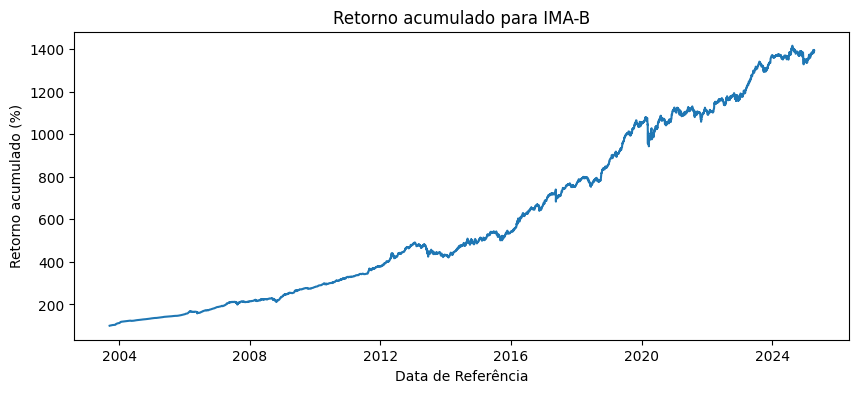

In [63]:
# Calculate the accumulated return
historic_imab['Accumulated Return'] = (1 + historic_imab['Variação Diária (%)'] / 100).cumprod()

# Plot the accumulated return
plt.figure(figsize=(10, 4))
plt.plot(historic_imab['Data de Referência'], historic_imab['Accumulated Return'] * 100, label='Accumulated Return')
plt.title('Retorno acumulado para IMA-B')
plt.xlabel('Data de Referência')
plt.ylabel('Retorno acumulado (%)')
plt.grid(False)
plt.show()

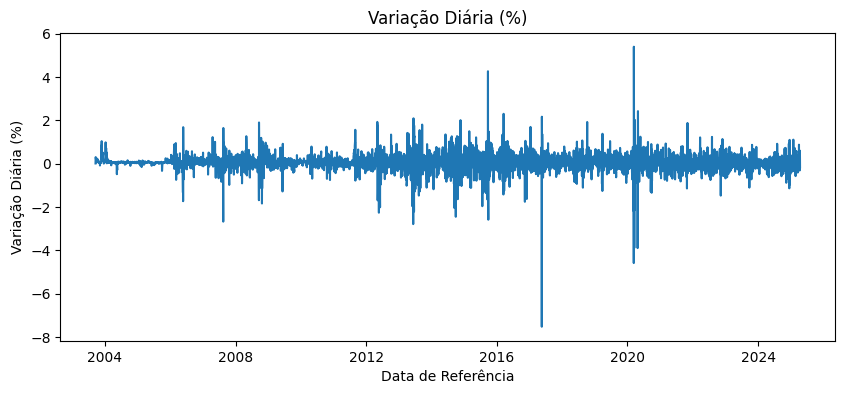

In [64]:
# Plot the 'Variação Diária (%)' column
plt.figure(figsize=(10, 4))
plt.plot(historic_imab['Data de Referência'], historic_imab['Variação Diária (%)'], label='Variação Diária (%)')
plt.title('Variação Diária (%)')
plt.xlabel('Data de Referência')
plt.ylabel('Variação Diária (%)')
plt.grid(False)
plt.show()

In [68]:
# Extract the year from the 'Data de Referência' column
historic_imab['Year'] = historic_imab['Data de Referência'].dt.year

# Group the returns by year and calculate the mean (Return) and standard deviation (Volatility)
annual_stats = historic_imab.groupby('Year')['Variação Diária (%)'].agg(['mean', 'std']).reset_index()

# Rename the columns for clarity
annual_stats.columns = ['Year', 'Mean Return', 'Volatility']

# Display the resulting dataframe
display(annual_stats)

,Year,Mean Return,Volatility
0,2003,0.154871,0.170348
1,2004,0.071937,0.106774
2,2005,0.051859,0.049660
3,2006,0.080594,0.290562
4,2007,0.053160,0.341482
5,2008,0.041975,0.394641
6,2009,0.069674,0.216548
7,2010,0.062922,0.199979
8,2011,0.056333,0.228110
9,2012,0.095195,0.433981


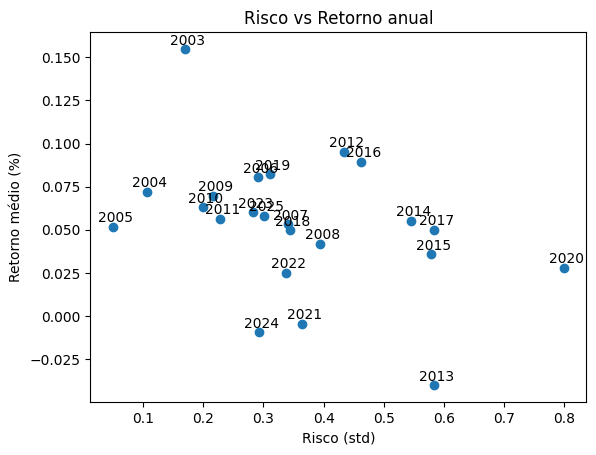

In [77]:
# Scatter Plot: Volatility x Return
plt.scatter(annual_stats['Volatility'], annual_stats['Mean Return'])
plt.xlabel('Risco (std)')
plt.ylabel('Retorno médio (%)')
plt.title('Risco vs Retorno anual')

# Legend and points
for i, txt in enumerate(annual_stats.index):
    plt.text(annual_stats['Volatility'][i] - 0.025, annual_stats['Mean Return'][i] + 0.005, annual_stats['Year'][i], va='center')

plt.show();